In [1]:
import numpy as np

In [2]:
class LDA:
    def __init__(self, X, y, k):
        self.n = X.shape[0]
        self.d = X.shape[1]
        self.k = k
        self.X = X
        self.y = y
        self.W = None
        
    def linear(self, X):
        y = self.W.T.dot(X)
        return y
    
    def fit(self):
        A = []
        B = []
        for i in range(self.n):
            if self.y[i] == 1:
                A.append(self.X[i])
            else:
                B.append(self.X[i])
         
        A = np.array(A)
        B = np.array(B)
        
        nA = A.shape[0]
        print(nA)
        nB = B.shape[0]
        
        m1 = np.mean(A, axis=0).reshape(-1, 1)
        m2 = np.mean(B, axis=0).reshape(-1, 1)
        
        SB = (m1 - m2).dot((m1 - m2).T)
        m1_ = np.tile(m1, (1, nA)).T
        m2_ = np.tile(m2, (1, nB)).T
        
        
        SW = (A-m1_).T.dot(A-m1_) + (B-m2_).T.dot(B-m2_)
        
        S = np.linalg.inv(SW).dot(SB)
        
        eig_value, eig_vector = np.linalg.eig(S)
        
        for i in range(0, eig_value.shape[0] - 1):
            for j in range(i+1 , eig_value.shape[0]):
                if(eig_value[j] > eig_value[i]):
                    eig_vector[i], eig_vector[j] = eig_vector[j], eig_vector[i]

        self.W = np.array(eig_vector[0])
        return self.W
    
    def transform(self):
        return self.W.dot(self.X)

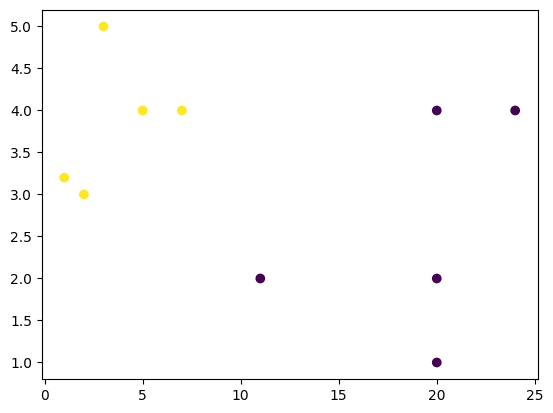

In [3]:
import matplotlib.pyplot as plt

X_train = np.array([[1, 3.2], [2, 3], [5,4], [7,4], [3, 5], [11, 2], [20,4], [24, 4], [20,2], [20, 1]])
y_train = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])
plt.scatter(X_train.T[0], X_train.T[1], c=y_train)

In [4]:
lda = LDA(X_train, y_train, k=1)
w = lda.fit()
w

5


array([0.42117295, 0.08025972])

In [5]:
X_ = np.array([[0, 0], [25, 0]])
y_ = X_.dot(w)
w

array([0.42117295, 0.08025972])

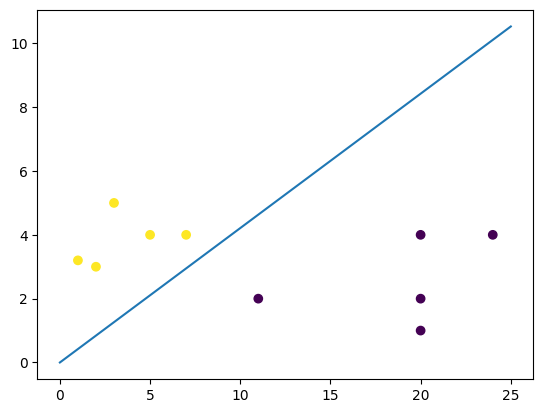

In [6]:
plt.scatter(X_train.T[0], X_train.T[1], c=y_train)
plt.plot(np.array([0, 25]), y_)